# pre processing on dataset

In [227]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import scipy as sp
from scipy import stats
import seaborn as sns 
import re
import nltk
from collections import Counter

# load dataset tweets.csv

In [228]:
# Read the CSV file
data = pd.read_csv('tweets.csv')
print (data.shape)
# Display the first few rows of the dataframe
data.head()

(6444, 28)


,id,handle,text,is_retweet,original_author,time,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,is_quote_status,lang,retweet_count,favorite_count,longitude,latitude,place_id,place_full_name,place_name,place_type,place_country_code,place_country,place_contained_within,place_attributes,place_bounding_box,source_url,truncated,entities,extended_entities
0,780925634159796224,HillaryClinton,The question in this election: Who can put the...,False,NaN,2016-09-28T00:22:34,NaN,NaN,NaN,False,en,218,651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://studio.twitter.com,False,{'media': [{'display_url': 'pic.twitter.com/Xr...,{'media': [{'display_url': 'pic.twitter.com/Xr...
1,780916180899037184,HillaryClinton,"Last night, Donald Trump said not paying taxes...",True,timkaine,2016-09-27T23:45:00,NaN,NaN,NaN,False,en,2445,5308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://twitter.com,False,{'media': [{'display_url': 'pic.twitter.com/t0...,{'media': [{'display_url': 'pic.twitter.com/t0...
2,780911564857761793,HillaryClinton,Couldn't be more proud of @HillaryClinton. Her...,True,POTUS,2016-09-27T23:26:40,NaN,NaN,NaN,False,en,7834,27234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://about.twitter.com/products/tweetdeck,False,"{'user_mentions': [{'id_str': '1536791610', 'n...",NaN
3,780907038650068994,HillaryClinton,"If we stand together, there's nothing we can't...",False,NaN,2016-09-27T23:08:41,NaN,NaN,NaN,False,en,916,2542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://studio.twitter.com,False,{'media': [{'display_url': 'pic.twitter.com/Q3...,{'media': [{'display_url': 'pic.twitter.com/Q3...
4,780897419462602752,HillaryClinton,Both candidates were asked about how they'd co...,False,NaN,2016-09-27T22:30:27,NaN,NaN,NaN,False,en,859,2882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://about.twitter.com/products/tweetdeck,False,"{'user_mentions': [], 'symbols': [], 'urls': [...",NaN


In [229]:
#accroding to the table, id (stands for user id) is not useful for the analysis, so we can drop it
#source_url is also not useful for the analysis, so we can drop it
#entities is also not useful for the analysis, so we can drop it
data = data.drop(['id','source_url','entities'], axis=1)

# Data cleaning

The purpose of this section is to identidy useless attributes and enhance the efficiency on data visualisation.

Note: you may need to restart the kernel to use updated packages.


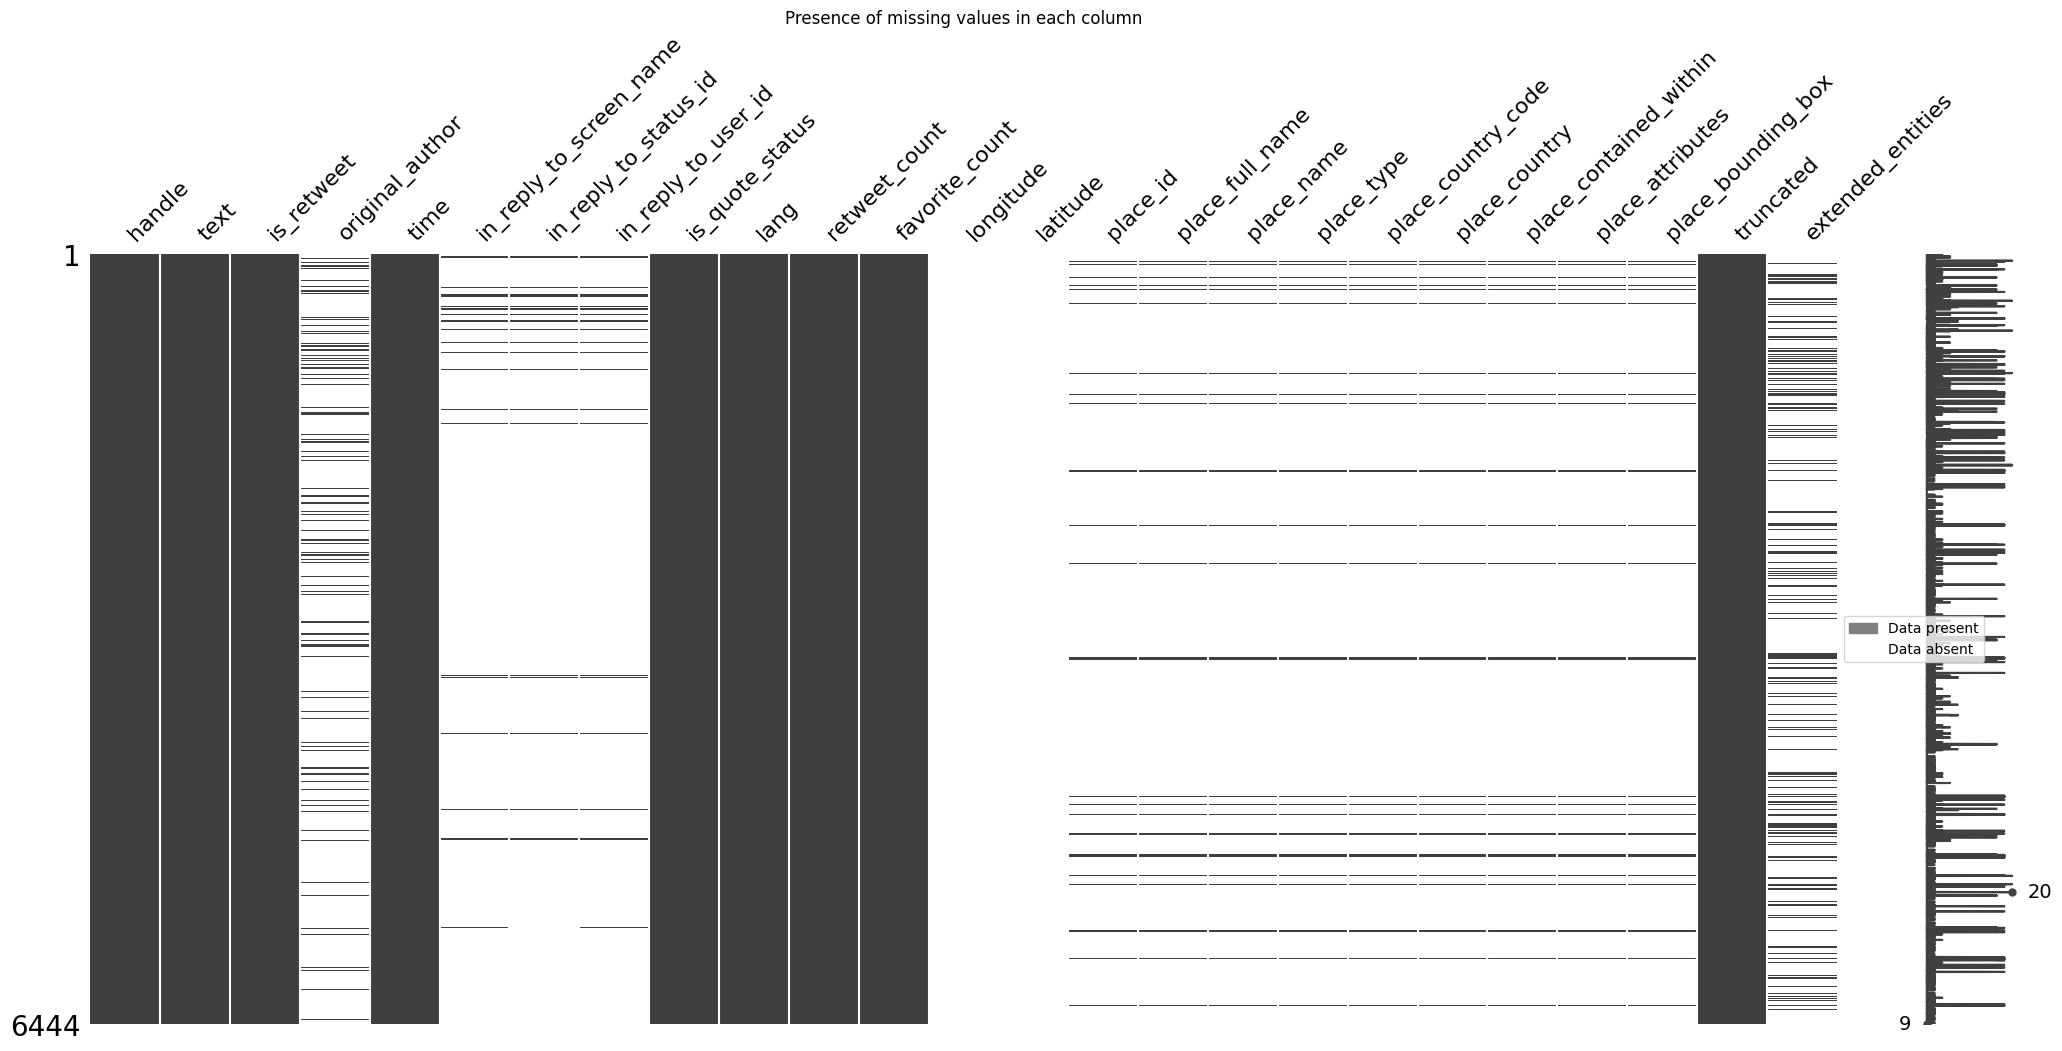

In [230]:
# visualize missing values using Missingno Library
# source:https://www.geeksforgeeks.org/python-visualize-missing-values-nan-values-using-missingno-library/
# Legend the matrix. source: https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Patch.html
%pip install missingno

import missingno as msno
import matplotlib.patches as mpatches

msno.matrix(data)
gray_patch = mpatches.Patch(color='grey', label='Data present')
white_patch = mpatches.Patch(color='white', label='Data absent ')
plt.legend(handles=[gray_patch, white_patch],loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Presence of missing values in each column')
plt.savefig('MissingValuesPresence')

In [231]:
#drop columns with high proportion missing values
data = data.drop(['original_author','in_reply_to_screen_name',
                    'in_reply_to_status_id','in_reply_to_user_id',
                    'longitude','latitude','place_id','place_full_name',
                    'place_name','place_type','place_country_code',
                    'place_country','place_contained_within','place_attributes',
                    'place_bounding_box','extended_entities'], axis=1)

In [232]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6444 entries, 0 to 6443
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   handle           6444 non-null   object
 1   text             6444 non-null   object
 2   is_retweet       6444 non-null   bool  
 3   time             6444 non-null   object
 4   is_quote_status  6444 non-null   bool  
 5   lang             6444 non-null   object
 6   retweet_count    6444 non-null   int64 
 7   favorite_count   6444 non-null   int64 
 8   truncated        6444 non-null   bool  
dtypes: bool(3), int64(2), object(4)
memory usage: 321.1+ KB


In [233]:
# detect data type for each column so we can compare with contents displaied above.
# detect categories
cat = data.loc[:,data.dtypes == 'object']
cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6444 entries, 0 to 6443
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   handle  6444 non-null   object
 1   text    6444 non-null   object
 2   time    6444 non-null   object
 3   lang    6444 non-null   object
dtypes: object(4)
memory usage: 201.5+ KB


In [234]:
data['time'] = pd.to_datetime(data['time'])
data['date'] = data['time'].dt.date

In [235]:
# detect numericals
num = data.loc[:,data.dtypes != 'object']
num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6444 entries, 0 to 6443
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   is_retweet       6444 non-null   bool          
 1   time             6444 non-null   datetime64[ns]
 2   is_quote_status  6444 non-null   bool          
 3   retweet_count    6444 non-null   int64         
 4   favorite_count   6444 non-null   int64         
 5   truncated        6444 non-null   bool          
dtypes: bool(3), datetime64[ns](1), int64(2)
memory usage: 170.0 KB


In [236]:
#detect of missing values in each column.
data.isna().sum()

handle             0
text               0
is_retweet         0
time               0
is_quote_status    0
lang               0
retweet_count      0
favorite_count     0
truncated          0
date               0
dtype: int64

In [237]:
data.head()

,handle,text,is_retweet,time,is_quote_status,lang,retweet_count,favorite_count,truncated,date
0,HillaryClinton,The question in this election: Who can put the...,False,2016-09-28 00:22:34,False,en,218,651,False,2016-09-28
1,HillaryClinton,"Last night, Donald Trump said not paying taxes...",True,2016-09-27 23:45:00,False,en,2445,5308,False,2016-09-27
2,HillaryClinton,Couldn't be more proud of @HillaryClinton. Her...,True,2016-09-27 23:26:40,False,en,7834,27234,False,2016-09-27
3,HillaryClinton,"If we stand together, there's nothing we can't...",False,2016-09-27 23:08:41,False,en,916,2542,False,2016-09-27
4,HillaryClinton,Both candidates were asked about how they'd co...,False,2016-09-27 22:30:27,False,en,859,2882,False,2016-09-27


In [238]:
data['handle'].value_counts(dropna=False)

handle
HillaryClinton     3226
realDonaldTrump    3218
Name: count, dtype: int64

## further cleaning for the text content

To better analyze the semantics of the text, basic text cleaning is necessary. This includes removing unstructured content such as hyperlinks, emojis, and meaningless punctuation, among other elements.

In [239]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
# convert some emojis to text so keep the meaning of the text
emoji_dict = {
    u"\U0001F600": "happy",  # grinning_face
    u"\U0001F601": "happy",  # beaming_face_with_smiling_eyes
    u"\U0001F602": "laughing",  # face_with_tears_of_joy
    u"\U0001F603": "happy",  # smiling_face_with_open_mouth
    u"\U0001F604": "happy",  # smiling_face_with_open_mouth_and_smiling_eyes
    u"\U0001F606": "laughing",  # smiling_face_with_open_mouth_and_closed_eyes
    u"\U0001F609": "wink",  # winking_face
    u"\U0001F60A": "happy",  # smiling_face_with_smiling_eyes
    u"\U0001F60D": "love",  # smiling_face_with_heart_eyes
    u"\U0001F618": "kiss",  # face_blowing_a_kiss
    u"\U0001F621": "angry",  # pouting_face
    u"\U0001F622": "sad",  # crying_face
    u"\U0001F62D": "crying",  # loudly_crying_face
    u"\U0001F624": "frustrated",  # face_with_steam_from_nose
    u"\U0001F631": "scared",  # face_screaming_in_fear
    u"\U0001F62A": "tired",  # sleepy_face
    u"\U0001F44D": "thumbs_up",  # thumbs_up
    u"\U0001F44E": "thumbs_down",  # thumbs_down
    u"\U0001F923": "laughing",  # rolling_on_the_floor_laughing
    u"\U0001F620": "angry",  # angry_face
    u"\U0001F637": "sick",  # face_with_medical_mask
    u"\U0001F634": "sleeping",  # sleeping_face
    u"\U0001F644": "eyeroll",  # face_with_rolling_eyes
    u"\U0001F60B": "yummy",  # face_savoring_food
    u"\U0001F60C": "relieved",  # relieved_face
    u"\U0001F60F": "smirk",  # smirking_face
    u"\U0001F60E": "cool",  # sunglasses
    u"\U0001F62F": "surprised"  # hushed_face
}

def replace_emoji(text):
    for emoji, description in emoji_dict.items():
        text = text.replace(emoji, f" {description} ")
    return ' '.join(text.split())

# clean text
def clean_text(text):
    # convert emojis to text
    text = replace_emoji(text)

    # remove URLs
    text = re.sub(r'http\S+', '', text)
    
    # remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # remove ‘@’ mentions and keep the text; mentions are used to refer to a user so we keep the text
    #since some mentions may refer to meaningful topics, we keep the text
    text = re.sub(r"@(\w+)", r"\1", text)

    # remove hashtags and keep the text; hashtage is used to represent a topic so we keep the text
    text = re.sub(r"#", "", text)
    
    # remove multiple spaces
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    
    # keep only alphabets and ! and ?
    text = re.sub(r'[^a-zA-Z0-9!?]+', ' ', text)

    # remove single characters that are meaningless, keep 'a', 'u' and 'I' as they are meaningful
    text = re.sub(r'\b[b-hj-tv-zB-HJ-TV-Z]\b', '', text)

    # remove numbers
    text = re.sub(r'[0-9]+', '', text)

    # split text into words and make them lowercase
    tokens = nltk.word_tokenize(text)
    tokens = [token.lower() for token in tokens]
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    return " ".join(tokens)

# apply the cleaning function to the text column
data['cleaned_text'] = data['text'].apply(clean_text)
# remove stopwords
stop_words = set(stopwords.words('english'))
stop_words.difference_update({'not', 'very', 'no', 'never'})
data['cleaned_text'] = data['cleaned_text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ailee\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ailee\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ailee\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [240]:
data[['text', 'cleaned_text']].head()

,text,cleaned_text
0,The question in this election: Who can put the...,question election put plan action make life be...
1,"Last night, Donald Trump said not paying taxes...",last night donald trump said not paying tax wa...
2,Couldn't be more proud of @HillaryClinton. Her...,proud hillaryclinton vision command last night...
3,"If we stand together, there's nothing we can't...",stand together nothing make sure ready vote
4,Both candidates were asked about how they'd co...,candidate asked confront racial injustice one ...


In [ ]:
data.to_csv('cleaned_tweets.csv', index=False)

# simple visualisation to explore the data